# Action Plan
- Time Series
- Principal Component Analysis
- Gradient Descent
- XGBoost
- KNN- K Nearest Neighbors
- ANN
- CNN
- NLP
- RNN


## Time Series


## Three types of variations
1. Long Term / Trend
    - with the change in population
2. Seasonal Variation
    - repeat itself after a certain number of timestamps, mostly with within a year
    - e.g. every Nov, sales are more
3. Random Variation
    - without any known reason
4. Cyclical Variation
    - not considered in time series modelling
    - repeats after a very long period of time
    - e.g. after every 10 yrs, there will be an economic depression

## Data Cleaning and Validation
1. find location of missing values and replace them with a certain value
    1. Replace the missing values with the average of all others (over-all average is same)
    2. Replace the missing value with the values from previous time stamp or next time stamp
        - Aug 2017 is missing, put the value of Jul 2017 or Sep 2017 in its place
    3. ```Linear Interpolation``` - Replace the missing value with the values with the average of previous & next time stamp
        - use when there is no seasonal variation
        - Aug 2017 is missing, put the average of  Jul 2017 and Sep 2017 in its place
    4. Replace the missing value with the value of same month in the previosu or next year
        - use when there is seasonal variation
        - Aug 2017 is missing, put the value of Aug 2016 and Aug 2018 in its place
2. Check for Extreme Values or the outliers
    - use box-plot for all available values to check outliers

## Errors
1. Mean Error (```ME```)
    - should not be used as +ve and -ve would cancel each other
    - mean of actual differences
2. Mean Absolute Error (```MAE```) / Mean Absolute Deviation (```MAD```)
    - mean of absolute differences
    - used to avoid the negative canceling effect
3. Mean Square Error (```MSE```)
    - mean of squares
    - probelm is interpreting the value you get from MSE, it is in squared unit
    - used to avoid the negative canceling effect
    - can be thought of as Variance
4. Root Mean Square Error (```RMSE```)
    - root of mean of squares
    - used to make the unit same as data to make it interpretable
    - used to avoid the negative canceling effect
    - most widely used error technique
    - can be thought of as S.D.

## Splitting in Time Series
- take ```first 70%``` records as ```Training``` data
- take ```last 30%``` records as ```Testing``` data
- build models, calculate their errors recommended with RMSE
- whichever model has least error, use that for predictions

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
# from google.colab import files
# uploaded = files.upload()
# CDAC_DataBook.xlsx

import os
os.chdir(r'C:\Users\surya\Downloads')
os.getcwd()

'C:\\Users\\surya\\Downloads'

In [ ]:
df = pd.read_excel('CDAC_DataBook.xlsx', sheet_name='birth')

In [ ]:
df.shape

(168, 1)

In [ ]:
168/12

14.0

In [ ]:
df.head()

,BirthRate
0,26.663
1,23.598
2,26.931
3,24.740
4,25.806


<Axes: >

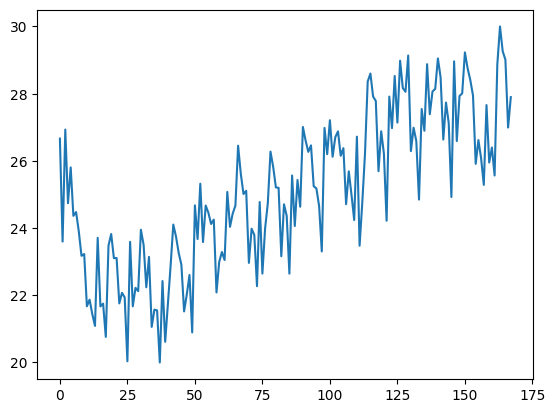

In [ ]:
df.BirthRate.plot()

In [ ]:
df_train = df.iloc[:144]

In [ ]:
df_train.shape

(144, 1)

In [ ]:
df_train.shape[0]/12

12.0

In [ ]:
df_test = df.iloc[144:]

In [ ]:
df_test.shape

(24, 1)

In [ ]:
df_test.shape[0]/12

2.0

In [ ]:
from pandas.core.arrays import period

In [ ]:
decomp = statsmodels.tsa.seasonal.seasonal_decompose(df['BirthRate'], period=12)

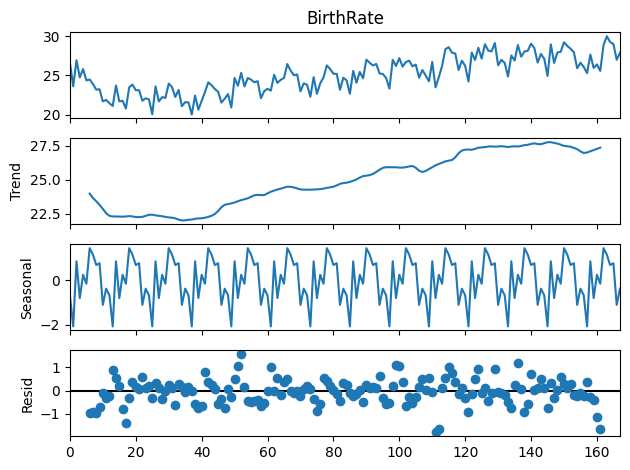

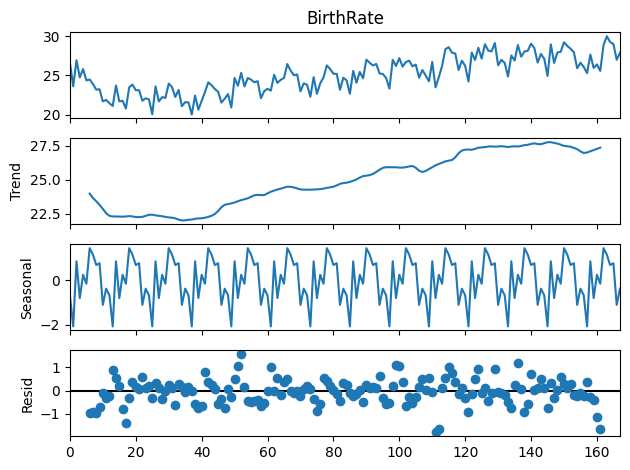

In [ ]:
decomp.plot()
# decompose to visualize different sources of variations

## techniques fro making predictions
1. Naive Method
    - whatever happened at the last will continue to happen
2.

### Naive Method

In [ ]:
df_arr = np.asarray(df_train['BirthRate'])
# convert the train data into an array

In [ ]:
y_hat = df_test.copy()
# create a copy for the test data

In [ ]:
len(df_arr)

144

In [ ]:
df_arr[140:]

array([29.048, 28.484, 26.634, 27.735])

In [ ]:
# y_hat['naive'] = df_arr[-1]
y_hat['naive'] = df_arr[len(df_arr)-1]
# create column for naive technique
y_hat.head()

,BirthRate,naive
144,27.132,27.735
145,24.924,27.735
146,28.963,27.735
147,26.589,27.735
148,27.931,27.735


In [ ]:
y_hat.shape

(24, 2)

In [ ]:
mse_naive = mean_squared_error(df_test['BirthRate'], y_hat['naive'])
mse_naive

2.038415583333333

In [ ]:
# in python we dont have a function for RMSE, so we take square root for MSE
rms_naive = sqrt(mean_squared_error(df_test['BirthRate'], y_hat['naive']))
rms_naive

1.4277309211939526

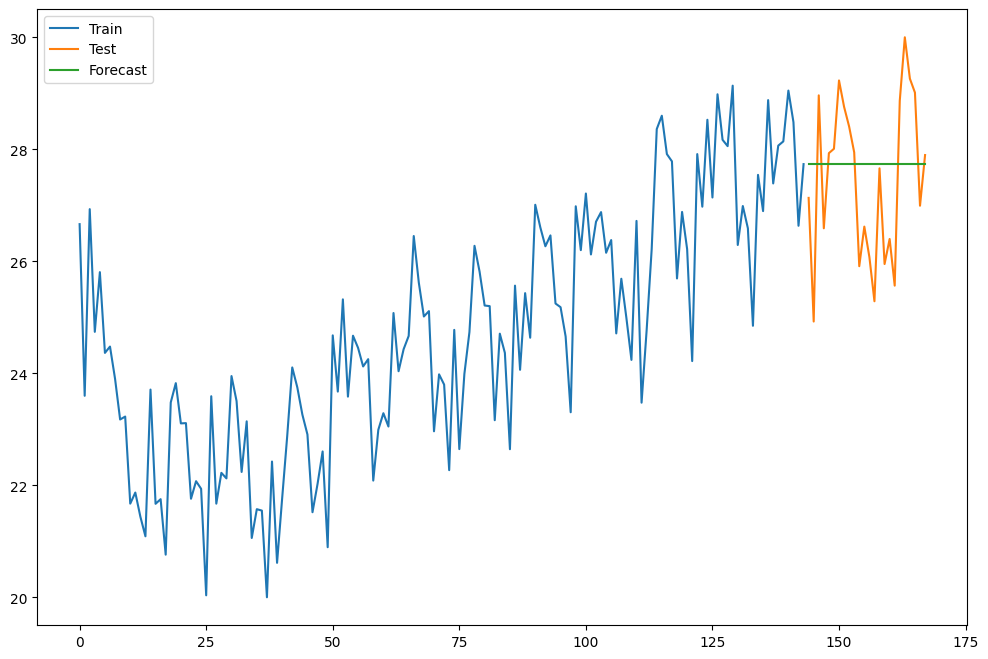

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(df_train.index, df_train['BirthRate'], label='Train')
plt.plot(df_test.index, df_test['BirthRate'], label='Test')
plt.plot(y_hat.index, y_hat['naive'], label='Forecast')
plt.legend()

### Simple Average Technique

In [ ]:
y_hat_avg = df_test.copy()

In [ ]:
y_hat_avg['SimpleAvg'] = df_train['BirthRate'].mean()
y_hat_avg.head()

,BirthRate,SimpleAvg
144,27.132,24.656833
145,24.924,24.656833
146,28.963,24.656833
147,26.589,24.656833
148,27.931,24.656833


In [ ]:
np.mean(df_train['BirthRate'])

24.656833333333335

In [ ]:
mse_SimpleAvg = mean_squared_error(df_test['BirthRate'], y_hat_avg['SimpleAvg'])
mse_SimpleAvg

9.907748666666658

In [ ]:
rms_SimpleAvg = sqrt(mean_squared_error(df_test['BirthRate'], y_hat_avg['SimpleAvg']))
rms_SimpleAvg

3.147657647627305

In [ ]:
rms_naive

1.4277309211939526

### ```MA``` (Moving Average Technique )

#### 12 months Moving Average

In [ ]:
y_hat_avg['MovingAvg'] = df_train['BirthRate'].rolling(12).mean().iloc[-1]
y_hat_avg.head()

,BirthRate,SimpleAvg,MovingAvg
144,27.132,24.656833,27.520917
145,24.924,24.656833,27.520917
146,28.963,24.656833,27.520917
147,26.589,24.656833,27.520917
148,27.931,24.656833,27.520917


In [ ]:
mse_MovingAvg = mean_squared_error(df_test['BirthRate'], y_hat_avg['MovingAvg'])
mse_MovingAvg

1.9725671180555553

In [ ]:
rms_MovingAvg = sqrt(mean_squared_error(df_test['BirthRate'], y_hat_avg['MovingAvg']))
rms_MovingAvg

1.4044810849760687

#### 6 months Moving Average

In [ ]:
y_hat_avg['MovingAvg6'] = df_train['BirthRate'].rolling(6).mean().iloc[-1]
y_hat_avg.head()

,BirthRate,SimpleAvg,MovingAvg,MovingAvg6
144,27.132,24.656833,27.520917,28.017833
145,24.924,24.656833,27.520917,28.017833
146,28.963,24.656833,27.520917,28.017833
147,26.589,24.656833,27.520917,28.017833
148,27.931,24.656833,27.520917,28.017833


In [ ]:
mse_MovingAvg = mean_squared_error(df_test['BirthRate'], y_hat_avg['MovingAvg6'])
mse_MovingAvg

2.265954999999998

In [ ]:
rms_MovingAvg = sqrt(mean_squared_error(df_test['BirthRate'], y_hat_avg['MovingAvg6']))
rms_MovingAvg

1.5053089383910527

#### 3 months Moving Average

In [ ]:
y_hat_avg['MovingAvg3'] = df_train['BirthRate'].rolling(3).mean().iloc[-1]
y_hat_avg.head()

,BirthRate,SimpleAvg,MovingAvg,MovingAvg6,MovingAvg3
144,27.132,24.656833,27.520917,28.017833,27.617667
145,24.924,24.656833,27.520917,28.017833,27.617667
146,28.963,24.656833,27.520917,28.017833,27.617667
147,26.589,24.656833,27.520917,28.017833,27.617667
148,27.931,24.656833,27.520917,28.017833,27.617667


In [ ]:
mse_MovingAvg = mean_squared_error(df_test['BirthRate'], y_hat_avg['MovingAvg3'])
mse_MovingAvg

1.9909738055555548

In [ ]:
rms_MovingAvg = sqrt(mean_squared_error(df_test['BirthRate'], y_hat_avg['MovingAvg3']))
rms_MovingAvg

1.4110187119792406

### Weighted Moving Average
- Last month(latest value) gets the weightage of 12
- first month(Earliest value) gets the weightage of 1

In [ ]:
values = df_train['BirthRate'].iloc[-12:]
values

132    26.589
133    24.848
134    27.543
135    26.896
136    28.878
137    27.390
138    28.065
139    28.141
140    29.048
141    28.484
142    26.634
143    27.735
Name: BirthRate, dtype: float64

In [ ]:
np.mean(values)

27.52091666666667

In [ ]:
wt_sum=0
denom=0
for ctr in range(len(values)):
    wt_sum = wt_sum + values.iloc[ctr]*(ctr+1)
    denom = denom + ctr + 1

In [ ]:
wt_avg = wt_sum / denom
wt_avg

27.806115384615385

In [ ]:
y_hat_avg['WtMovAvg'] = wt_avg
y_hat_avg

,BirthRate,SimpleAvg,MovingAvg,MovingAvg6,MovingAvg3,WtMovAvg
144,27.132,24.656833,27.520917,28.017833,27.617667,27.806115
145,24.924,24.656833,27.520917,28.017833,27.617667,27.806115
146,28.963,24.656833,27.520917,28.017833,27.617667,27.806115
147,26.589,24.656833,27.520917,28.017833,27.617667,27.806115
148,27.931,24.656833,27.520917,28.017833,27.617667,27.806115
149,28.009,24.656833,27.520917,28.017833,27.617667,27.806115
150,29.229,24.656833,27.520917,28.017833,27.617667,27.806115
151,28.759,24.656833,27.520917,28.017833,27.617667,27.806115
152,28.405,24.656833,27.520917,28.017833,27.617667,27.806115
153,27.945,24.656833,27.520917,28.017833,27.617667,27.806115


In [ ]:
mse_WtMovingAvg = mean_squared_error(df_test['BirthRate'], y_hat_avg['WtMovAvg'])
mse_WtMovingAvg

2.0805715069033526

In [ ]:
rms_WtMovingAvg = sqrt(mean_squared_error(df_test['BirthRate'], y_hat_avg['WtMovAvg']))
rms_WtMovingAvg

1.442418630947116

### Exponential Smoothing

#### Simple Exponential Smoothing
- ```α``` needs to be fixed between ```0 and 1```, normally taken as between ```0.7 and 0.8```

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [ ]:
mod1 = SimpleExpSmoothing(np.asarray(df_train['BirthRate'])).fit(smoothing_level=0.8)

c:\users\surya\appdata\local\programs\python\python39\lib\site-packages\pandas\util\_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [ ]:
y_hat_avg['SES'] = mod1.forecast(len(df_test))
y_hat_avg.head()

,BirthRate,SimpleAvg,MovingAvg,MovingAvg6,MovingAvg3,WtMovAvg,SES
144,27.132,24.656833,27.520917,28.017833,27.617667,27.806115,27.591807
145,24.924,24.656833,27.520917,28.017833,27.617667,27.806115,27.591807
146,28.963,24.656833,27.520917,28.017833,27.617667,27.806115,27.591807
147,26.589,24.656833,27.520917,28.017833,27.617667,27.806115,27.591807
148,27.931,24.656833,27.520917,28.017833,27.617667,27.806115,27.591807


In [ ]:
mse_SES = mean_squared_error(df_test['BirthRate'], y_hat_avg['SES'])
mse_SES

1.9842208847363638

In [ ]:
rms_SES = sqrt(mean_squared_error(df_test['BirthRate'], y_hat_avg['SES']))
rms_SES

1.4086237555629835

#### Holt's Linear Trend Method
-

In [ ]:
mod2 = Holt(np.asarray(df_train['BirthRate'])).fit(smoothing_level=0.75)
y_hat_avg['HoltLinear'] = mod2.forecast(len(df_test))
y_hat_avg.head()

In [ ]:
mse_HoltLinear = mean_squared_error(df_test['BirthRate'], y_hat_avg['HoltLinear'])
mse_HoltLinear

2.553348838881854

In [ ]:
rms_HoltLinear = sqrt(mean_squared_error(df_test['BirthRate'], y_hat_avg['HoltLinear']))
rms_HoltLinear

#### Holt-Winter's method
- used for both linear and seasonal trends

In [ ]:
mod3 = ExponentialSmoothing(np.asarray(df_train['BirthRate']), seasonal_periods=12).fit()
y_hat_avg['HoltWinter'] = mod3.forecast(len(df_test))
y_hat_avg.head()

,BirthRate,SimpleAvg,MovingAvg,MovingAvg6,MovingAvg3,WtMovAvg,SES,HoltLinear,HoltWinter
144,27.132,24.656833,27.520917,28.017833,27.617667,27.806115,27.591807,27.504863,27.693688
145,24.924,24.656833,27.520917,28.017833,27.617667,27.806115,27.591807,27.453516,27.693688
146,28.963,24.656833,27.520917,28.017833,27.617667,27.806115,27.591807,27.402169,27.693688
147,26.589,24.656833,27.520917,28.017833,27.617667,27.806115,27.591807,27.350822,27.693688
148,27.931,24.656833,27.520917,28.017833,27.617667,27.806115,27.591807,27.299475,27.693688


In [ ]:
mse_HoltWinter = mean_squared_error(df_test['BirthRate'], y_hat_avg['HoltWinter'])
mse_HoltWinter

2.018571317547638

In [ ]:
rms_HoltWinter = sqrt(mean_squared_error(df_test['BirthRate'], y_hat_avg['HoltWinter']))
rms_HoltWinter

1.4207643427210714